<a href="https://colab.research.google.com/github/gittEze/LinearRegression_Predict-Diabetes/blob/main/11_Regresi%C3%B3n_lineal_m%C3%BAltiple_con_Predict_Diabetes_from_Medical_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

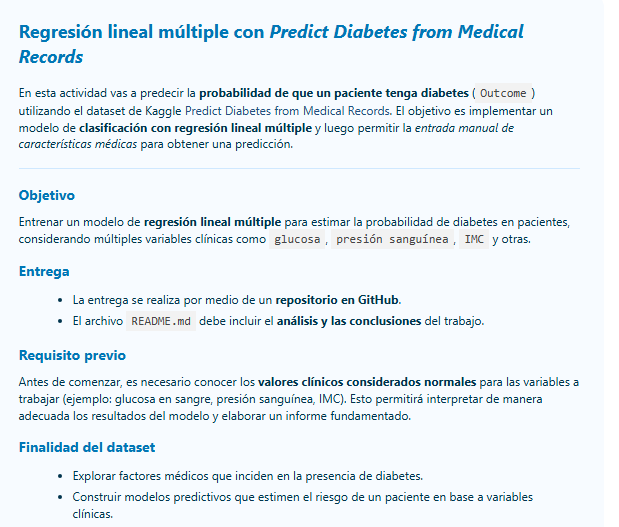

In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

df.info(5)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.columns = ['Embarazos', 'Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina', 'IMC', 'FuncionPeligroDiabetes', 'Edad', '']

df.info(5)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Embarazos               768 non-null    int64  
 1   Glucosa                 768 non-null    int64  
 2   PresionArterial         768 non-null    int64  
 3   GrosorPiel              768 non-null    int64  
 4   Insulina                768 non-null    int64  
 5   IMC                     768 non-null    float64
 6   FuncionPeligroDiabetes  768 non-null    float64
 7   Edad                    768 non-null    int64  
 8   Resultado               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Embarazos,Glucosa,PresionArterial,GrosorPiel,Insulina,IMC,FuncionPeligroDiabetes,Edad,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


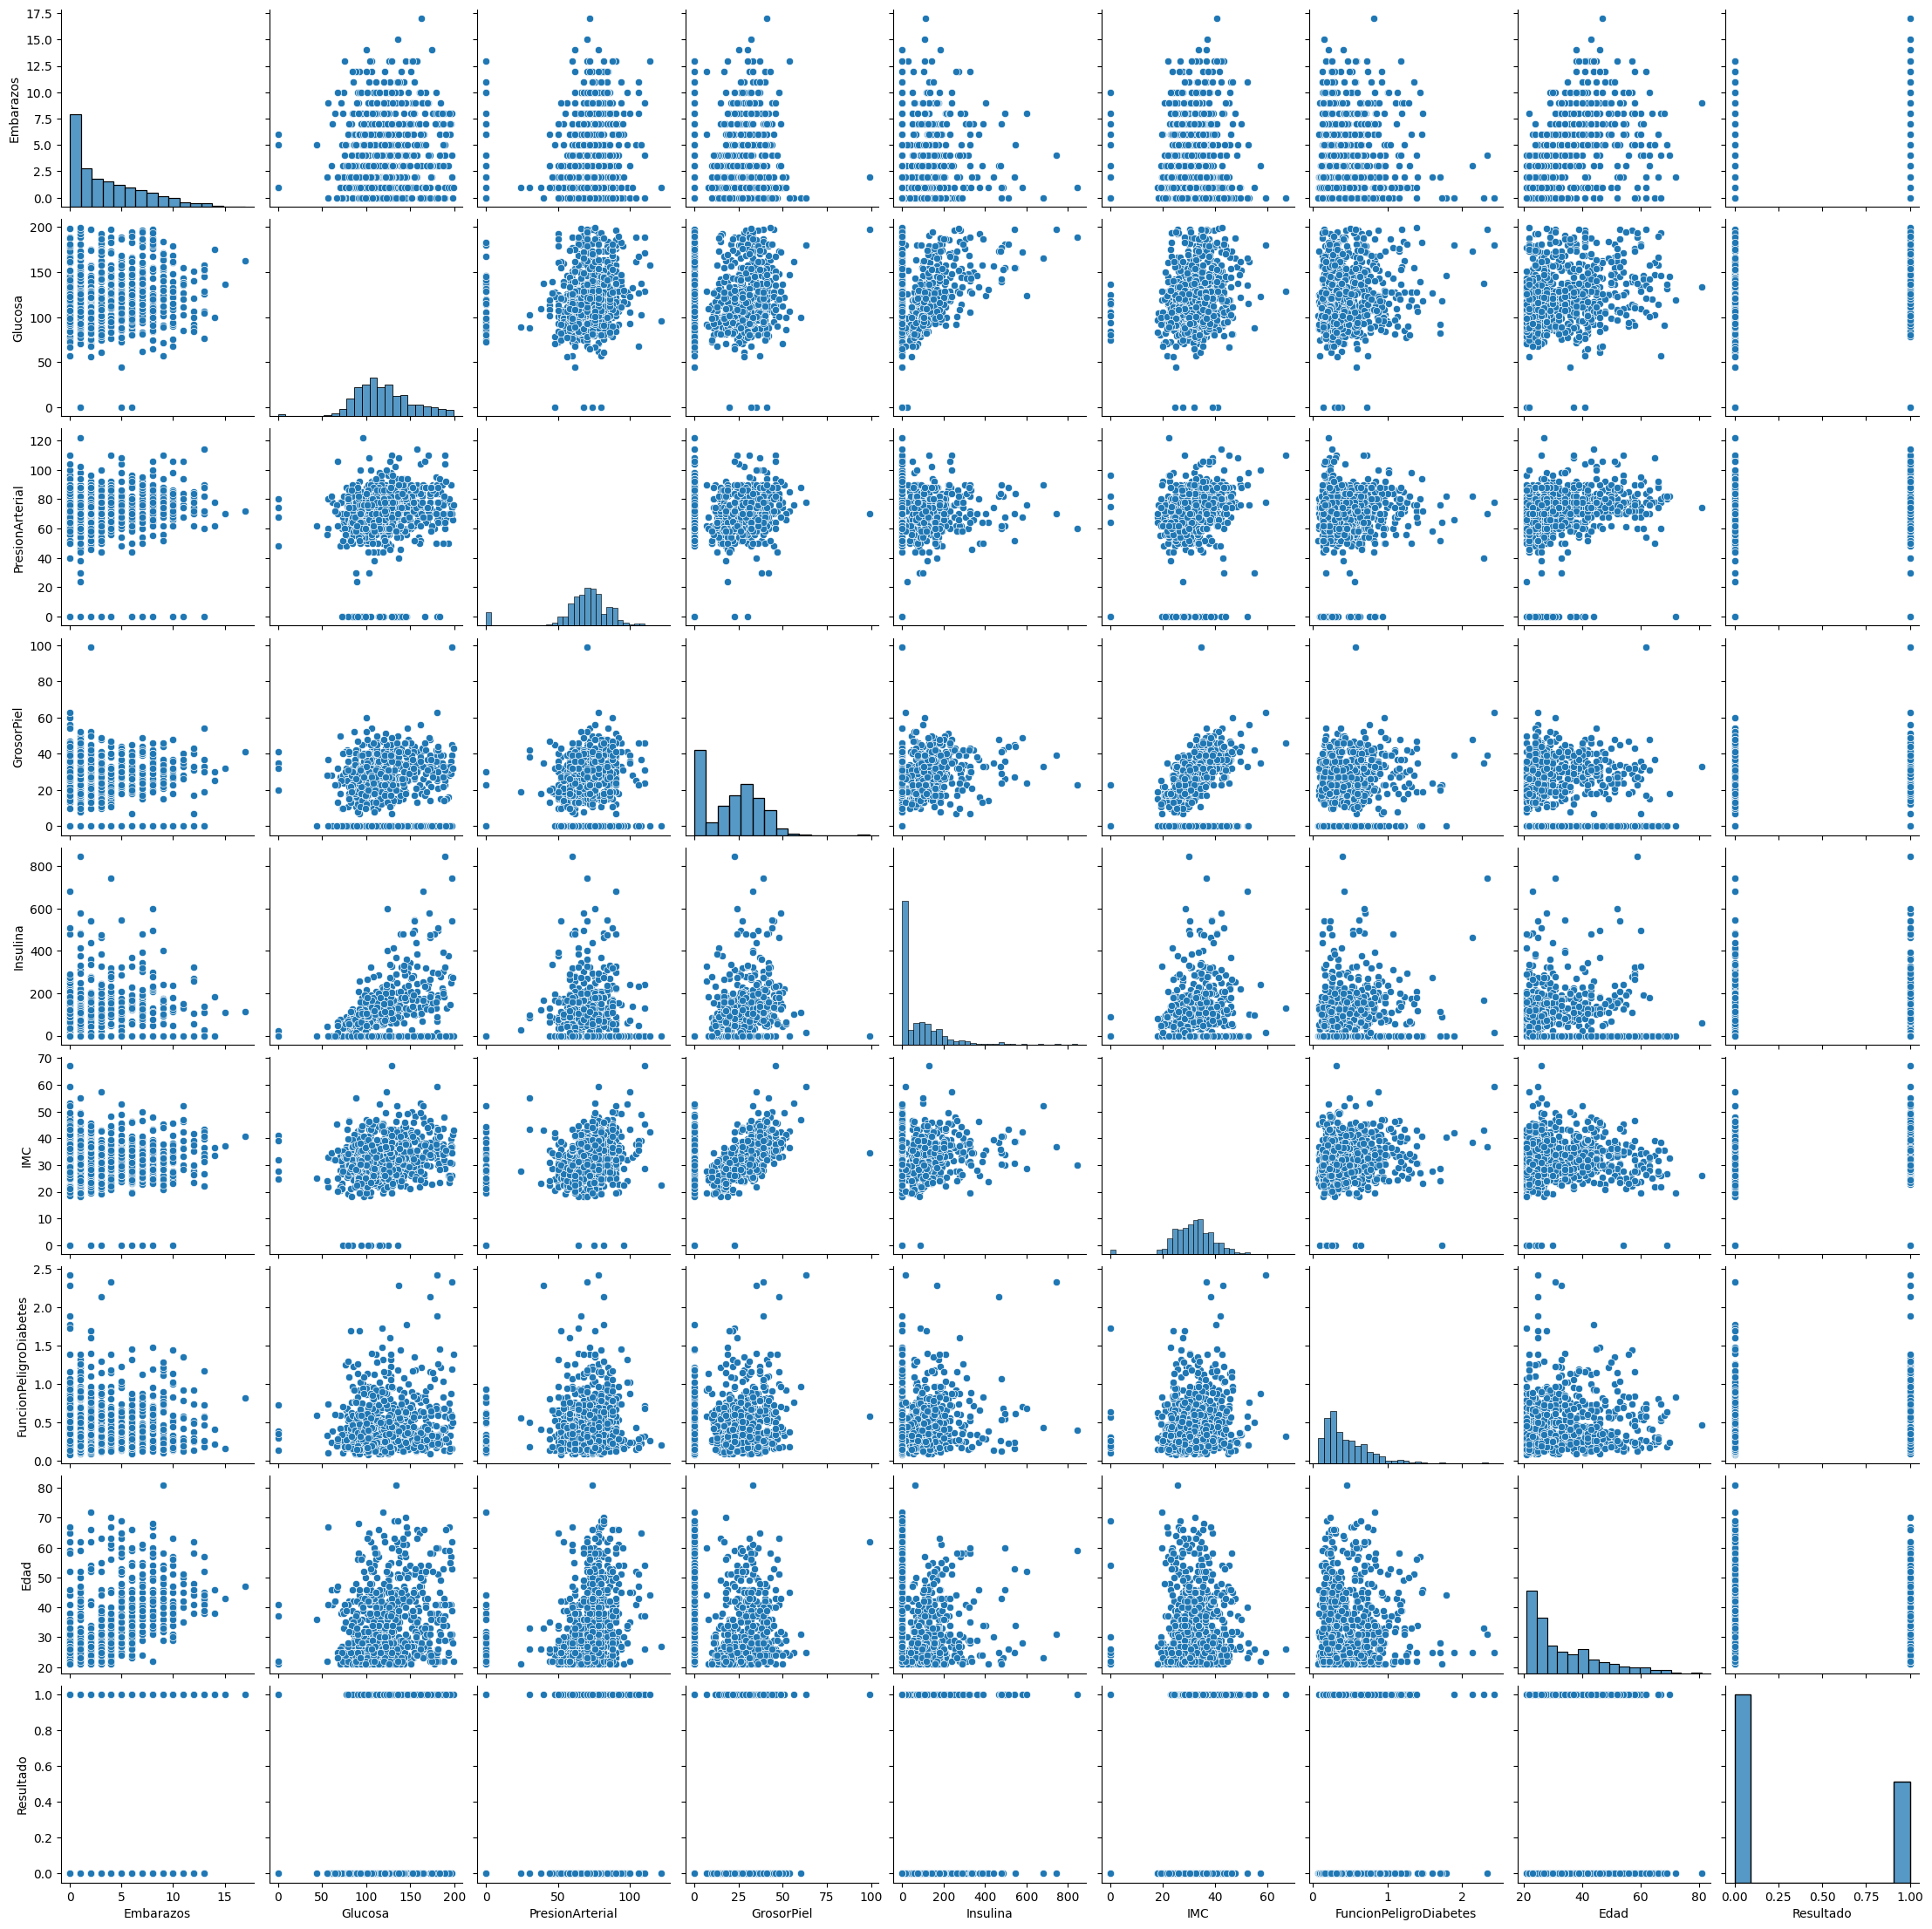

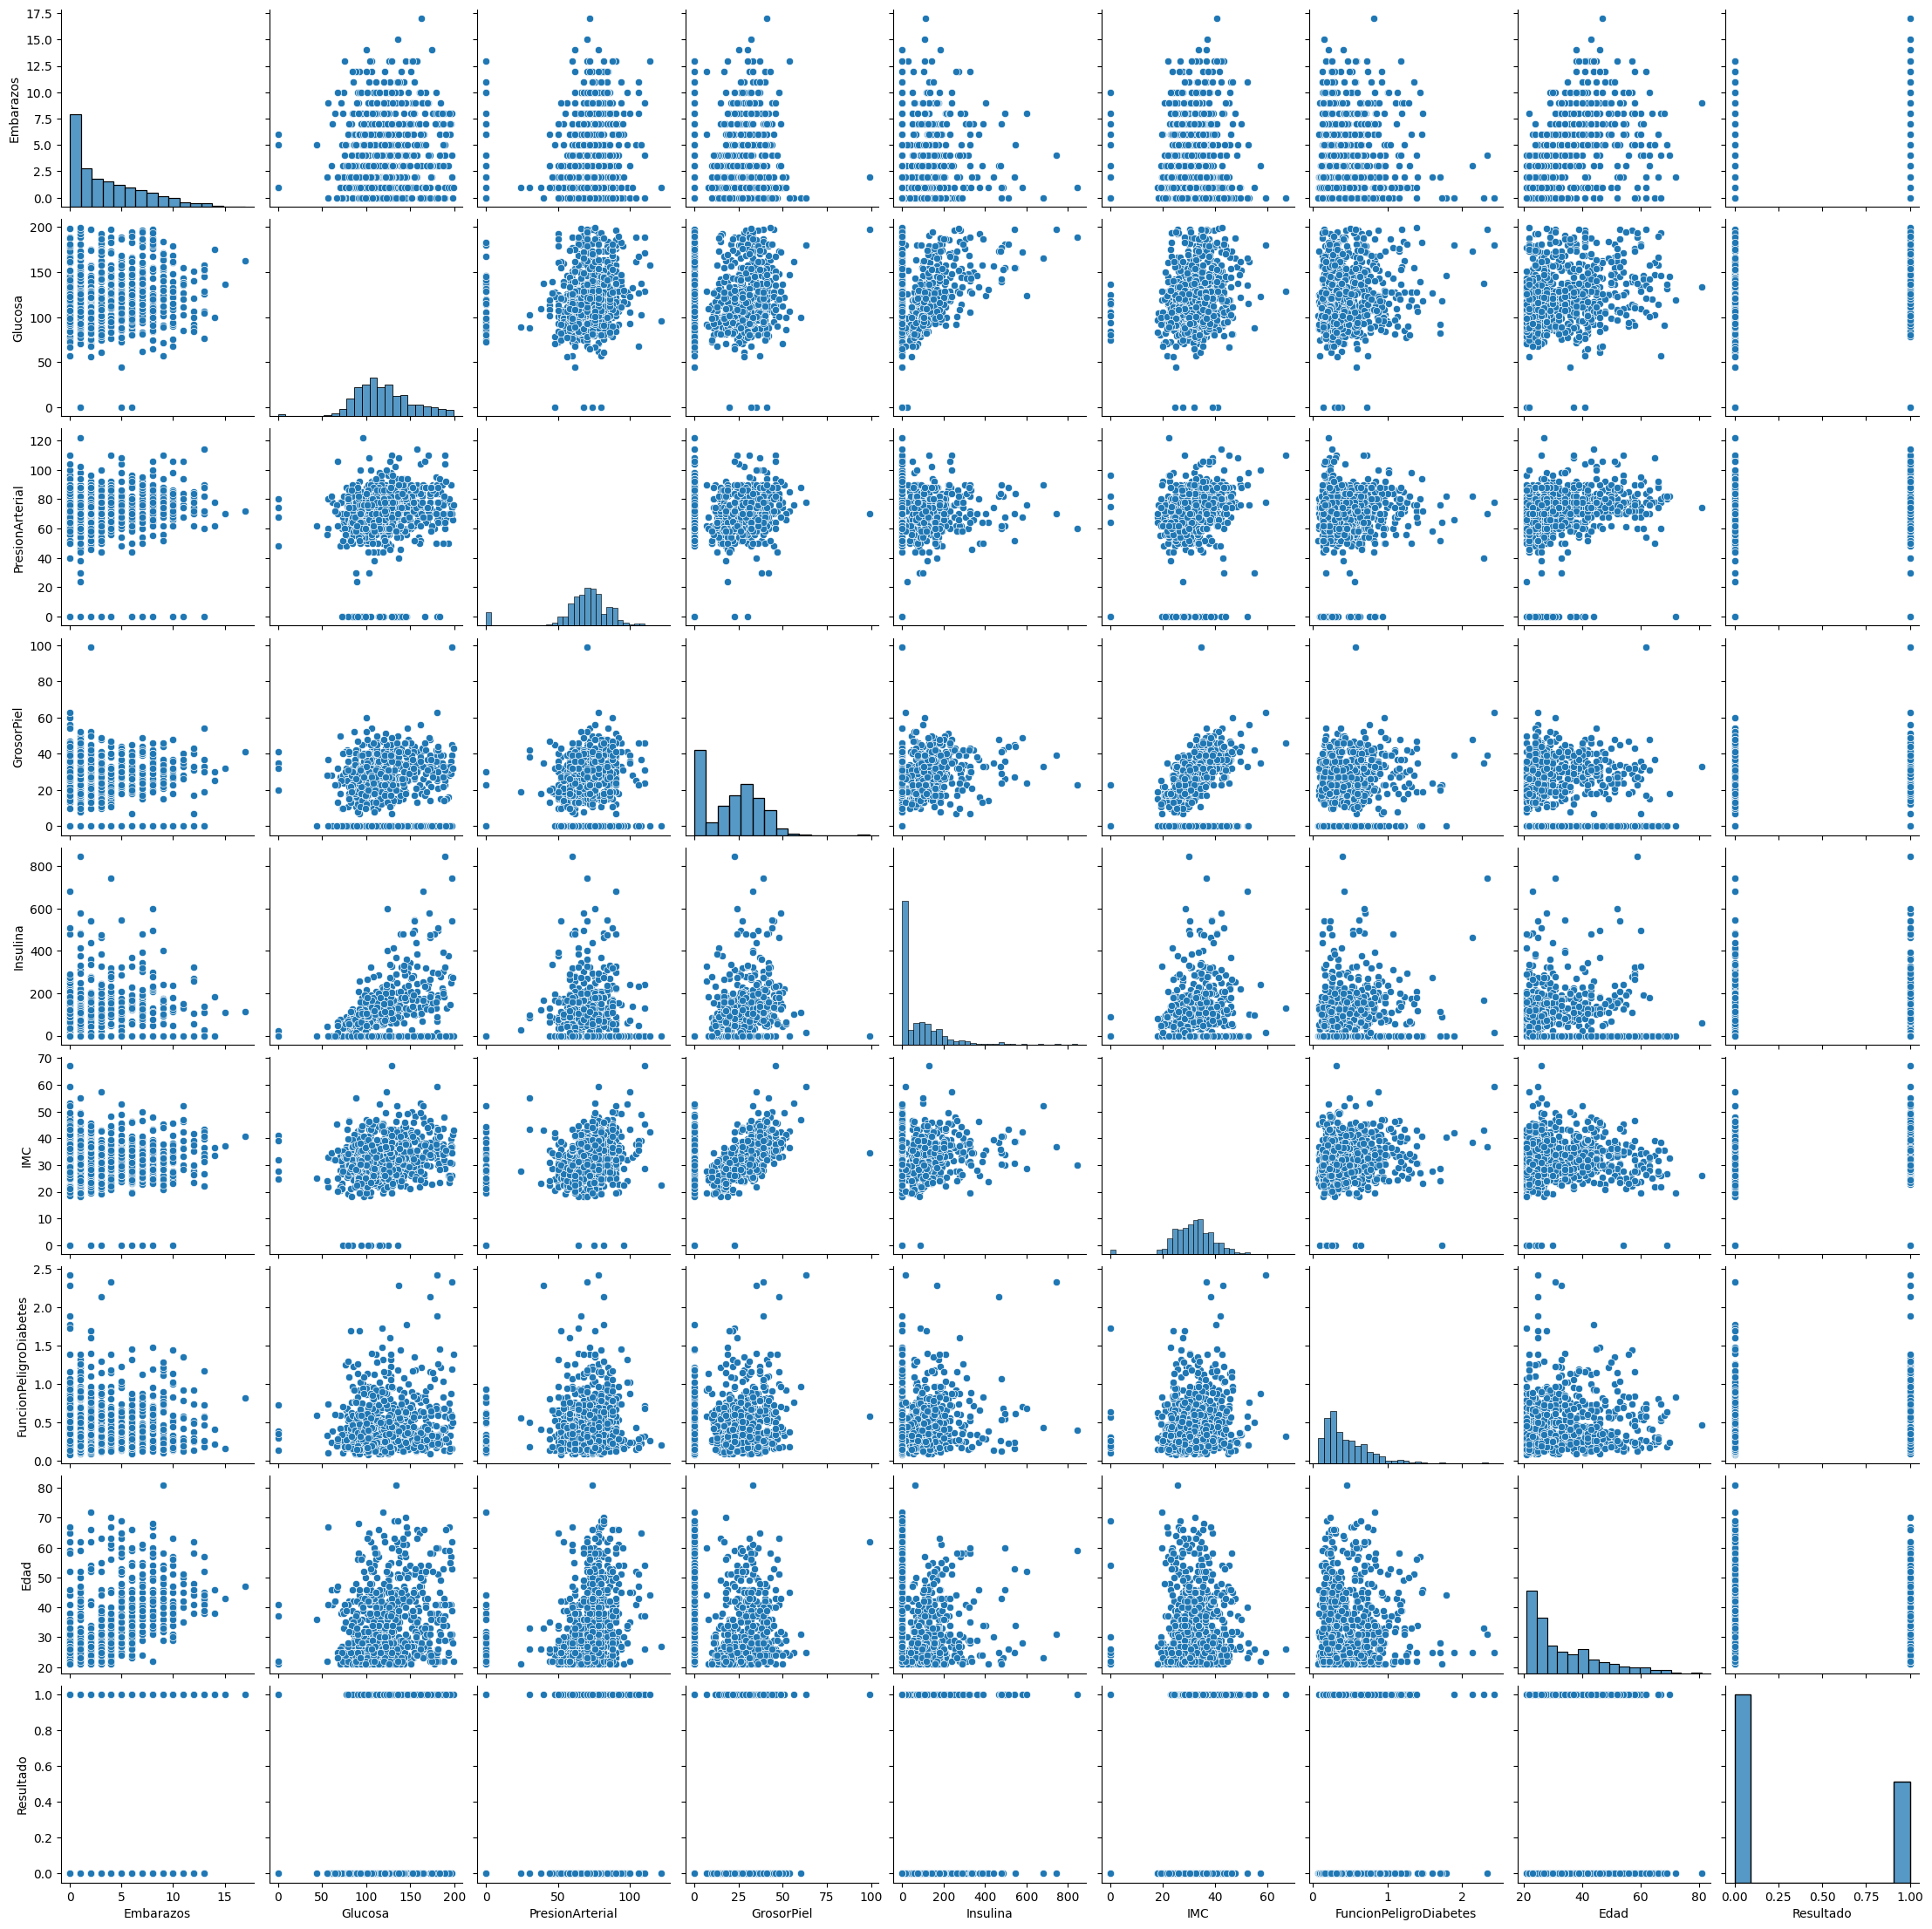

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)

cols = ['Embarazos', 'Glucosa', 'PresionArterial', 'GrosorPiel', 'Insulina', 'IMC', 'FuncionPeligroDiabetes', 'Edad', 'Resultado']
sns.pairplot(df[cols])
plt.show()

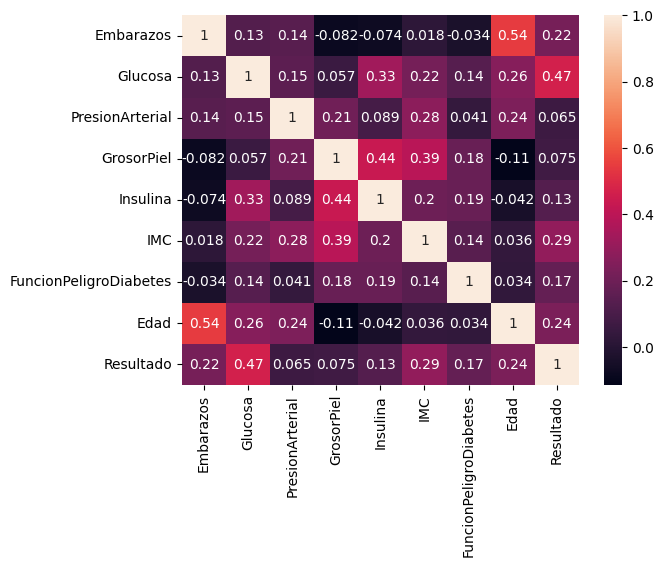

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variables independientes
x = df[['Glucosa', 'IMC', 'Edad']].values           # Cuando se ponen 2 datos o mas, no es necesario le .reshape porque ya me los trae como columna.

# Variable dependiente
y = df['Resultado'].values.reshape(-1, 1)    # Hace falta el .reshape porque al ser solo 1 dato lo trae como array y lo convierte a columna

sx = StandardScaler()
sy = StandardScaler()

X_s = sx.fit_transform(x)
Y_s = sy.fit_transform(y)

# Creacion del modelo
lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

In [ ]:
import numpy as np

print("Ingrese su peso y estatura para obtener su IMC")
peso = float(input("Ingrese su peso en kilogramos: "))
estatura = float(input("Ingrese su estatuca en metros: "))

datoIMC = (peso / (estatura ** 2))

datoGlucosa = float(input("Ingresar glucosa: "))
#datoIMC = float(input("Ingresar IMC: "))
datoEdad = int(input("Ingresar edad: "))

print("")
print("Su IMC es: ", datoIMC)
print("")

# s = estandar

# entrada estandarizada
input_s = sx.transform(np.array([[datoGlucosa, datoIMC, datoEdad]]))

# salida estandarizada
output_s = lr.predict(input_s)

# salida des-estandarizada
output = sy.inverse_transform(output_s)


print("La probabilidad de que tenga diabetes es: ", round(output[0][0] * 100, 2), "%.")

Ingrese su peso y estatura para obtener su IMC
Ingrese su peso en kilogramos: 80
Ingrese su estatuca en metros: 1.64
Ingresar glucosa: 140
Ingresar edad: 24

Su IMC es:  29.744199881023206

La probabilidad de que tenga diabetes es:  38.37 %.


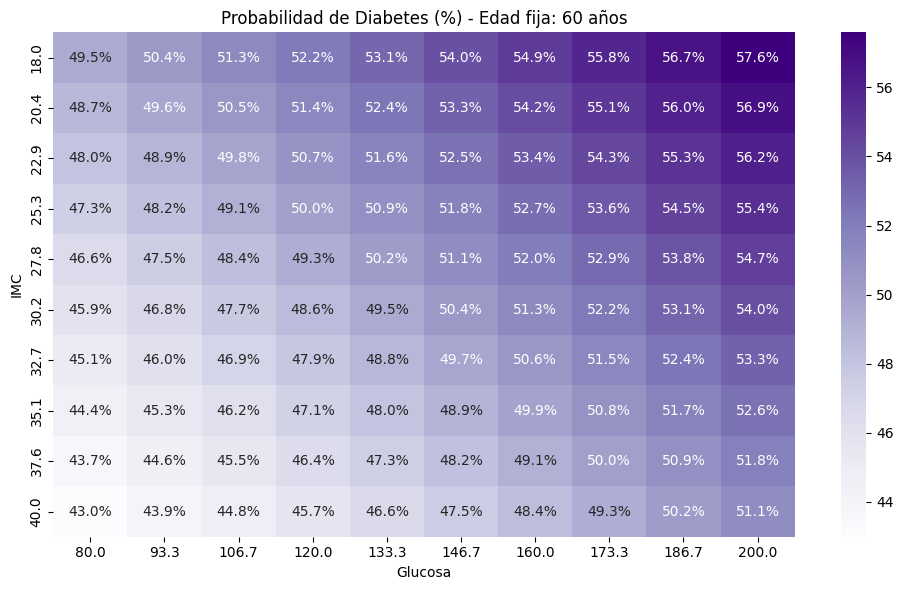

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Simulación de un DataFrame como el de diabetes
np.random.seed(42)
n = 500

df = pd.DataFrame({
    'Embarazos': np.random.randint(0, 10, size=n),
    'Glucosa': np.random.randint(70, 200, size=n),
    'PresionArterial': np.random.randint(60, 100, size=n),
    'GrosorPiel': np.random.randint(10, 50, size=n),
    'Insulina': np.random.randint(15, 276, size=n),
    'IMC': np.round(np.random.normal(32, 5, size=n), 1),
    'FuncionPeligroDiabetes': np.round(np.random.uniform(0.1, 2.5, size=n), 2),
    'Edad': np.random.randint(21, 80, size=n),
    'Resultado': np.round(np.random.uniform(0, 1, size=n), 2)  # resultado como probabilidad simulada
})

# Variables independientes y dependiente
x = df[['Glucosa', 'IMC', 'Edad']].values
y = df['Resultado'].values.reshape(-1, 1)

# Estandarización
sx = StandardScaler()
sy = StandardScaler()
X_s = sx.fit_transform(x)
Y_s = sy.fit_transform(y)

# Modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_s, Y_s)

# Crear combinaciones de glucosa, IMC y edad fija para el heatmap
glucosa_vals = np.linspace(80, 200, 10)
imc_vals = np.linspace(18, 40, 10)
glucosa_grid, imc_grid = np.meshgrid(glucosa_vals, imc_vals)
edad_fija = 60  # Edad fija

# Preparar los datos para predicción
input_grid = np.column_stack((glucosa_grid.ravel(), imc_grid.ravel(), np.full_like(glucosa_grid.ravel(), edad_fija)))

# Estandarizar entrada
input_s = sx.transform(input_grid)

# Predecir y desestandarizar
output_s = lr.predict(input_s)
output = sy.inverse_transform(output_s) * 100

# Crear matriz para el heatmap
matriz_probs = output.reshape(len(imc_vals), len(glucosa_vals))
annot_matrix = np.array([f"{v:.1f}%" for v in matriz_probs.flatten()]).reshape(matriz_probs.shape)

# Gráfico de calor con color a elección
plt.figure(figsize=(10, 6))
sns.heatmap(
    matriz_probs,
    xticklabels=np.round(glucosa_vals, 1),
    yticklabels=np.round(imc_vals, 1),
    cmap='Purples',      # ← Usa 'Blues' para celeste o 'Purples' para morado
    annot=annot_matrix,
    fmt=''
)
plt.xlabel('Glucosa')
plt.ylabel('IMC')
plt.title(f'Probabilidad de Diabetes (%) - Edad fija: {edad_fija} años')
plt.tight_layout()
plt.show()
